Some on-chain metrics for bitcoin

In [1]:
from functions.functions import *
from visualization.line_graph import *
from api.GlassnodeAPI import GlassnodeAPI
import numpy as np

In [2]:
glassnode_api_key = open("/home/malimi/Skillset/glassnode_api_key.txt",'r').read()[:-1]
g = GlassnodeAPI(key=glassnode_api_key)

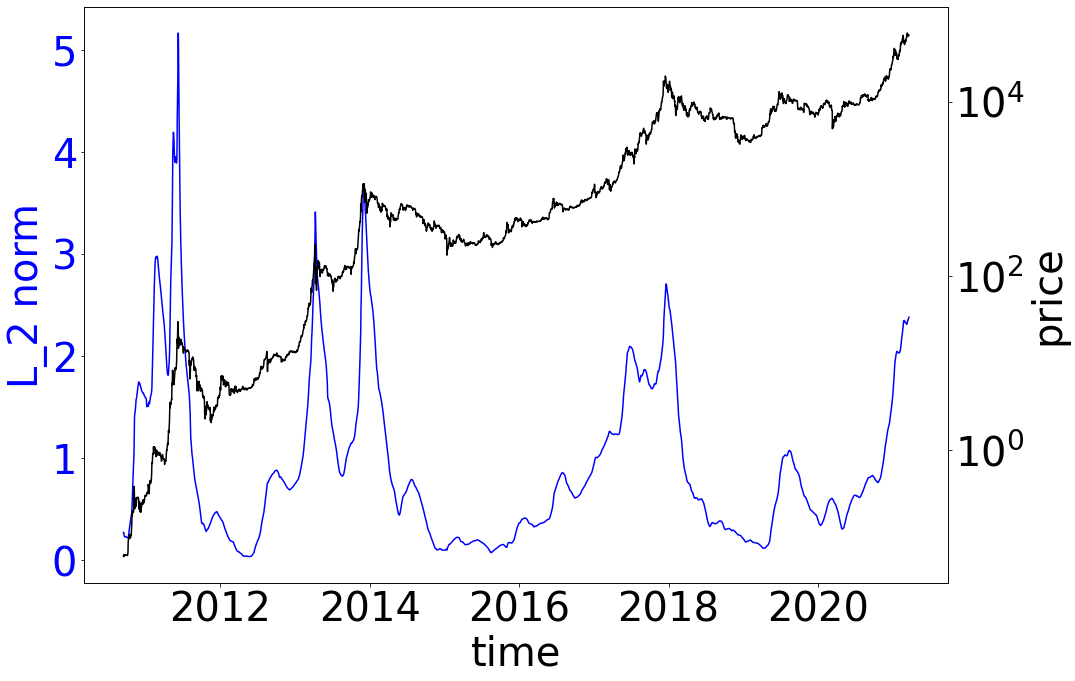

In [3]:
def market_to_realized_cap_moving_L_k_norm(df, step=60, k=2):
    aux = moving_L_k_norm(df['price'],df['realized price'],k,step)
    fig, ax1, ax2 = with_price_in_background(df['time'][step:],df['price'][step:])
    ax1.set_ylabel(f'L_{k} norm',color='blue', fontsize=40)
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=40)
    ax1.plot(df['time'][step:],aux,color='blue')
    plt.show()
df = g.get_price_realized_price()
market_to_realized_cap_moving_L_k_norm(df)

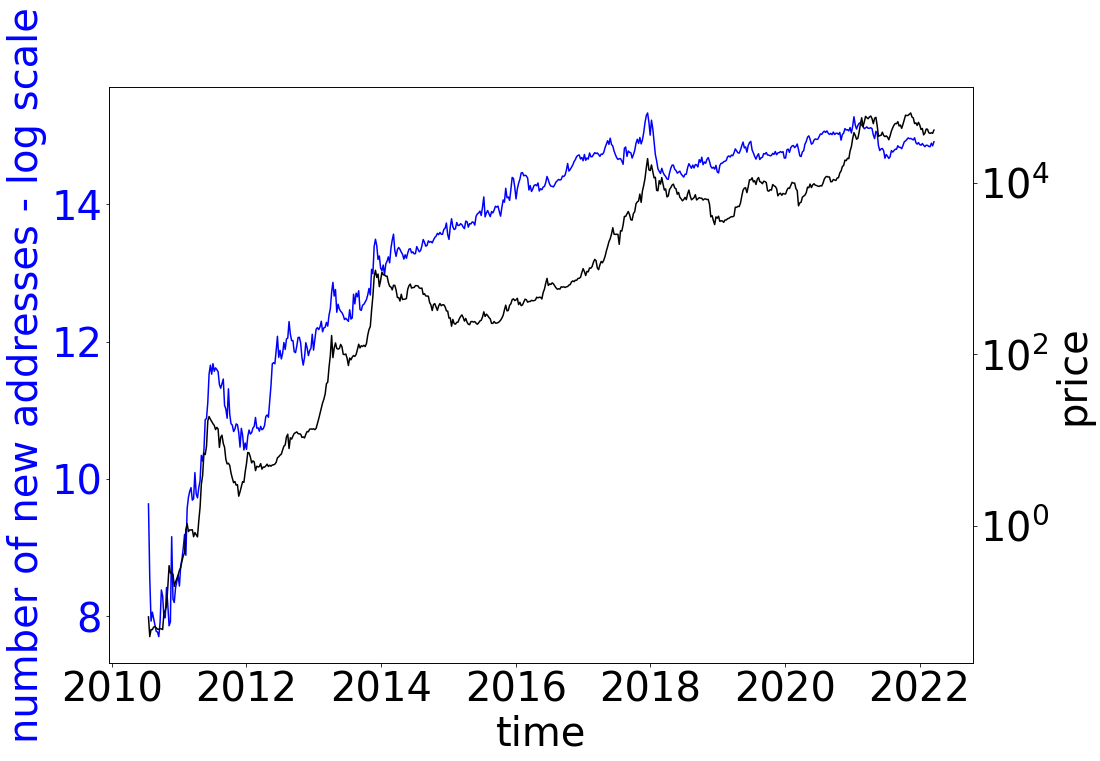

In [4]:
def new_addresses(df):
    fig, ax1, ax2 = with_price_in_background(df['time'],df['price'])
    ax1.set_ylabel(f'number of new addresses - log scale',color='blue', fontsize=40)
    ax1.tick_params(axis='y', labelcolor='blue', labelsize=40)
    ax1.plot(df['time'],df['number of new addresses'].apply(np.log),color='blue')
    plt.show()
df = g.get_new_addresses_and_price(period='week')
new_addresses(df)

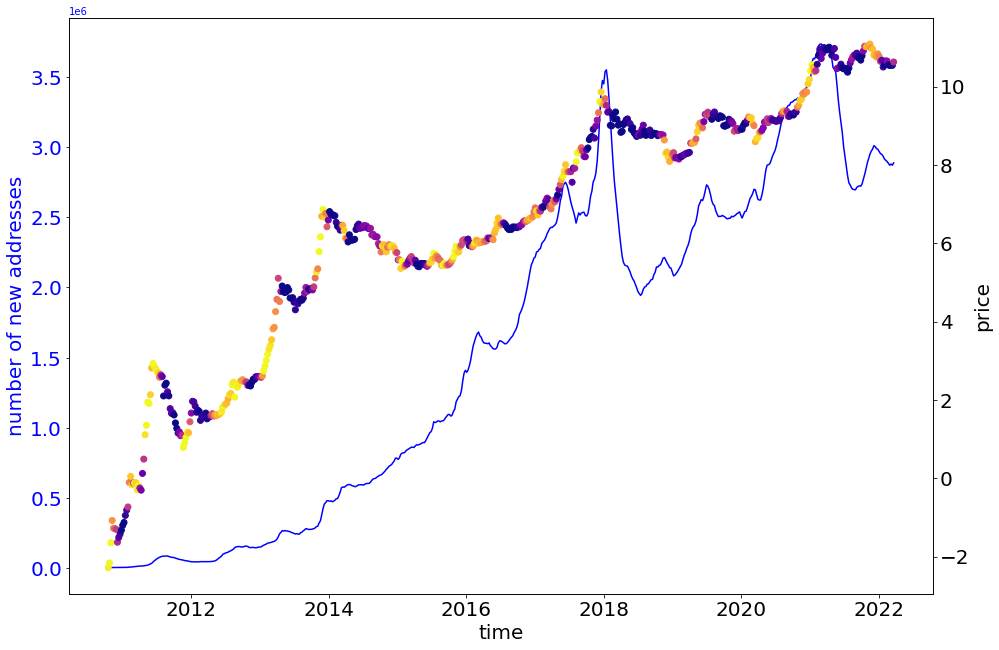

In [5]:
# the light points are closer to 0, which means distribution
# the dark points are close to 1, which means accumulation
def accumulation_trend_score_addresses(df, step):
    fontsize=20
    fig, ax1, ax2 = background(fontsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize, labelcolor='blue')
    ax2.set_ylabel(f'price', fontsize=fontsize)
    ax1.set_ylabel(f'number of new addresses', fontsize=fontsize, color='blue')
    ax2.scatter(df['time'][step:],df['price'][step:].apply(np.log), c=df['score'][step:], cmap='plasma')
    ax1.plot(df['time'][step:], exponential_moving_average(df['number of new addresses'], step+1), color='blue')
    plt.show()
df = g.get_accumulation_trend_score_and_price(period='week').merge(g.get_new_addresses(period='week'), on='time')
accumulation_trend_score_addresses(df, 13)

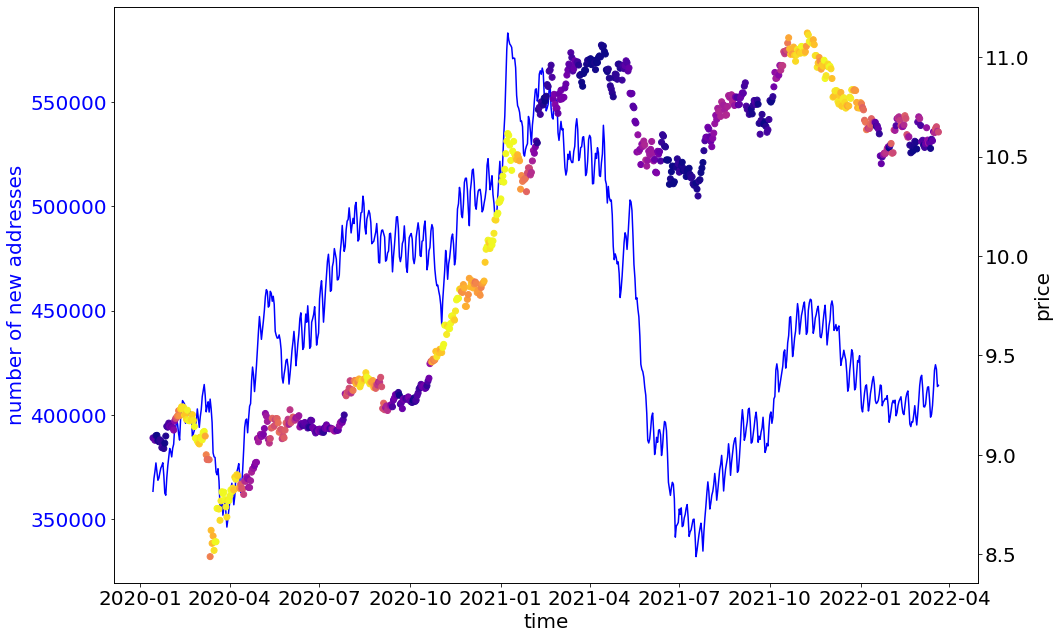

In [6]:
df = g.get_accumulation_trend_score_and_price(period='day').merge(g.get_new_addresses(period='day'), on='time')
accumulation_trend_score_addresses(df[df['time'].dt.year > 2019].reset_index(), 13)

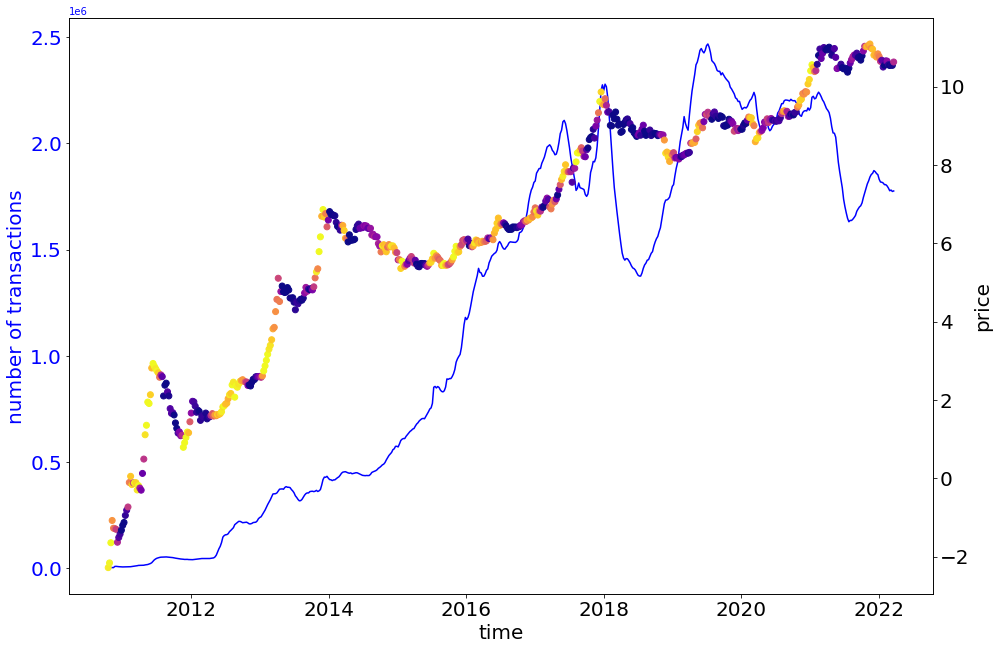

In [7]:
# the light points are closer to 0, which means distribution
# the dark points are close to 1, which means accumulation
def accumulation_trend_score_transaction(df, step):
    fontsize=20
    fig, ax1, ax2 = background(fontsize=fontsize)
    ax1.tick_params(axis='y', labelsize=fontsize, labelcolor='blue')
    ax2.set_ylabel(f'price', fontsize=fontsize)
    ax1.set_ylabel(f'number of transactions', fontsize=fontsize, color='blue')
    ax2.scatter(df['time'][step:],df['price'][step:].apply(np.log), c=df['score'][step:], cmap='plasma')
    ax1.plot(df['time'][step:], exponential_moving_average(df['number of transactions'], step+1), color='blue')
    plt.show()
df = g.get_accumulation_trend_score_and_price(period='week').merge(g.get_number_of_transactions(period='week'), on='time')
accumulation_trend_score_transaction(df, 13)

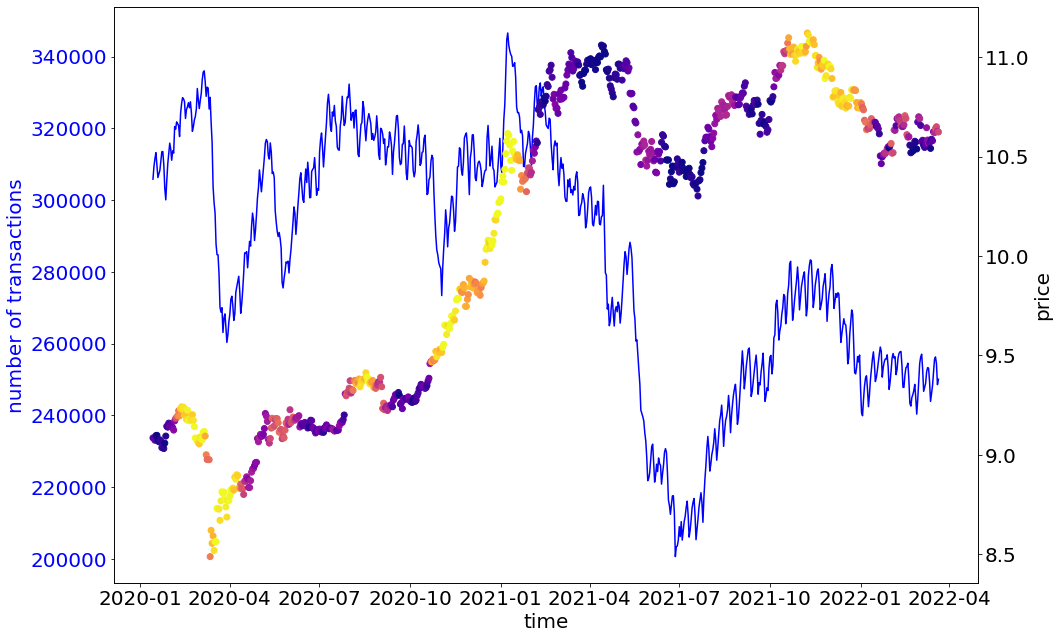

In [8]:
df = g.get_accumulation_trend_score_and_price(period='day').merge(g.get_number_of_transactions(period='day'), on='time')
accumulation_trend_score_transaction(df[df['time'].dt.year > 2019].reset_index(), 13)